<a href="https://colab.research.google.com/github/Aryabhatt-O/Computational-Geometry/blob/main/plot_mean_shift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# The mean-shift clustering algorithm

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.


number of estimated clusters : 5


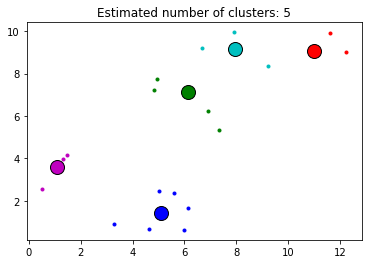

array([[ 5.97344038,  0.62847575],
       [ 9.23103313,  8.3371543 ],
       [ 7.91452564,  9.94596028],
       [ 4.64114004,  0.68980238],
       [12.25235414,  9.00425003],
       [ 5.00842185,  2.47707653],
       [ 4.82330303,  7.20858746],
       [ 1.33185704,  3.99253224],
       [ 6.90575957,  6.22878013],
       [ 1.45566137,  4.16835454],
       [ 6.69913247,  9.21970546],
       [ 6.14315609,  1.66618442],
       [10.92281284,  9.01085293],
       [ 7.33890008,  5.33286152],
       [ 3.2699205 ,  0.88626076],
       [11.60729396,  9.92911983],
       [ 5.60783476,  2.35514116],
       [ 4.93021277,  7.75836799],
       [ 5.04965994,  1.18677624],
       [ 0.50825328,  2.57515092]])

In [ ]:


import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[2, 3],[5, 2],[4,1],[5,7],[6,1],[7,9],[8,6],[12,9],[10,9]]
X, _ = make_blobs(n_samples=20, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
#The estimated bandwidth increases with increase in quantile resulting in less number of clusters.
#Similarly, decrease in quantile decreases the bandwidth and hence higher no. of clusters.
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=20)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()
X

# Convex HULL

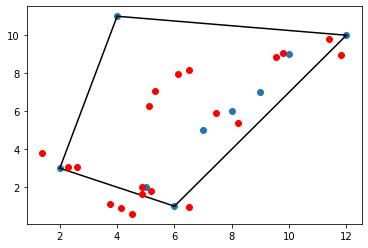

In [ ]:
#,[5, 2],[4,11],[9,7],[6,1],[7,5],[8,6],[12,10],[10,9]]
from scipy.spatial import ConvexHull, convex_hull_plot_2d
restro = np.array([[2, 3],[5, 2],[4,11],[9,7],[6,1],[7,5],[8,6],[12,10],[10,9]])
friends_location = np.array([[ 7.45551508,  5.91916609],
       [ 2.29479859,  3.08426414],
       [11.40723254,  9.78434511],
       [ 9.56002355,  8.85562736],
       [ 4.85309039,  1.98652602],
       [ 1.37997151,  3.80454738],
       [ 4.88075961,  1.63630707],
       [ 2.59685708,  3.0835286 ],
       [ 9.78062274,  9.08866152],
       [ 6.49526892,  8.16509474],
       [ 5.09673349,  6.30086143],
       [ 5.18153494,  1.77719189],
       [ 4.51759916,  0.59339006],
       [ 8.23382418,  5.36660431],
       [ 6.11162495,  7.97767112],
       [ 6.50661778,  0.94147021],
       [11.79524549,  8.97360086],
       [ 5.31742305,  7.06927185],
       [ 3.74726787,  1.10630291],
       [ 4.14241705,  0.90041266]])
hull = ConvexHull(friends_location)
hull1 = ConvexHull(restro)

# import matplotlib.pyplot as plt
# plt.plot(friends_location[:,0], friends_location[:,1], 'o')
# for simplex in hull.simplices:
#     plt.plot(friends_location[simplex, 0], friends_location[simplex, 1], 'k-')

import matplotlib.pyplot as plt
plt.plot(restro[:,0], restro[:,1], 'o')
for simplex in hull1.simplices:
    plt.plot(restro[simplex, 0], restro[simplex, 1], 'k-')

# plt.show()
x, y = friends_location.T
plt.plot(x,y, 'ro')
plt.show()

In [ ]:
hull.simplices

array([[14,  5],
       [18,  5],
       [18, 12],
       [15, 16],
       [15, 12],
       [ 2, 16],
       [ 9, 14],
       [ 9,  2]], dtype=int32)

In [ ]:
hull.neighbors

array([[1, 6],
       [0, 2],
       [4, 1],
       [5, 4],
       [2, 3],
       [3, 7],
       [0, 7],
       [5, 6]], dtype=int32)

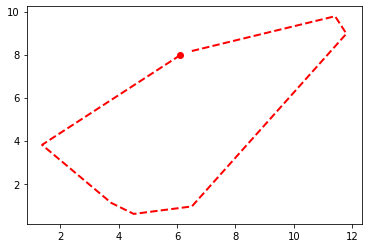

In [ ]:
plt.plot(friends_location[hull.vertices,0], friends_location[hull.vertices,1], 'r--', lw=2)
plt.plot(friends_location[hull.vertices[0],0], friends_location[hull.vertices[0],1], 'ro')
plt.show()